In [1]:
# import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import pylab
from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import chi2_contingency
from sklearn.model_selection import KFold
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import cross_val_score, KFold
from sklearn.inspection import permutation_importance
from sklearn.model_selection import cross_val_predict
import matplotlib.pyplot as plt

In [2]:
# import data

df = pd.read_csv("/Users/idaba/OneDrive/Desktop/BANA 698/Data.csv")

In [3]:
# get column names

df.columns

Index(['CountryID', 'Year', 'CountryName', 'Region', 'IncomeLevel', 'FDINet',
       'FDIInflowstoGDP', 'FDIInflows', 'FDIOutflowsPercent', 'FDIOutflows',
       'GDP', 'GDPGrowth', 'GovernmentSpending', 'GrossNationalSpending',
       'InflationConsumerPrices', 'InflationRate', 'InflationPercent',
       'MilitarySpending', 'GoodsNetTrade', 'GoodsandServicesNetTrade',
       'TradePercent', 'ServicesTradedPercent', 'ElectricityAccess',
       'AgriculturalCarbonDioxide', 'TransportCarbonDioxide',
       'WasteCarbonDioxide', 'ForestArea', 'RenewableEnergyConsumption',
       'TotalGreenhouseGas', 'LongTermExternalDebt', 'TotalPSD', 'LongTermPSD',
       'ShortTermPSD', 'InterestPaymentsPercent', 'ExternalDebt', 'TotalDebt',
       'FemaleLifeExpectancy', 'MaleLifeExpectancy', 'TotalLifeExpectancy',
       'AdultLiteracyRate', 'YouthLiteracyRate', 'BasicDrinkingWater',
       'SafelyManagedDrinkingWater', 'BasicHandwashing', 'PovertyRatio',
       'NationalPovertyRatio', 'SocialPoverty

In [4]:
df.head

<bound method NDFrame.head of     CountryID  Year   CountryName                      Region  \
0         MAR  2021       Morocco  Middle East & North Africa   
1         ABW  2021         Aruba   Latin America & Caribbean   
2         AFG  2021   Afghanistan                  South Asia   
3         AGO  2021        Angola          Sub-Saharan Africa   
4         ALB  2021       Albania       Europe & Central Asia   
..        ...   ...           ...                         ...   
646       XKX  2023        Kosovo       Europe & Central Asia   
647       YEM  2023   Yemen, Rep.  Middle East & North Africa   
648       ZAF  2023  South Africa          Sub-Saharan Africa   
649       ZMB  2023        Zambia          Sub-Saharan Africa   
650       ZWE  2023      Zimbabwe          Sub-Saharan Africa   

             IncomeLevel        FDINet  FDIInflowstoGDP    FDIInflows  \
0    Lower middle income -1.621385e+09         1.594223  2.264149e+09   
1            High income -1.384008e+08     

In [5]:
# see statistics 

df.describe().round()

,Year,FDINet,FDIInflowstoGDP,FDIInflows,FDIOutflowsPercent,FDIOutflows,GDP,GDPGrowth,GovernmentSpending,GrossNationalSpending,...,BasicHandwashing,PovertyRatio,NationalPovertyRatio,SocialPovertyRatio,UnemploymentwithAdvancedEducation,UnemploymentwithBasicEducation,UnemploymentWithintermediateEducation,TotalUnemployment,YouthUnemployment,ExchangeRate
count,651.0,5.080000e+02,540.0,5.510000e+02,500.0,5.110000e+02,6.090000e+02,610.0,4.880000e+02,4.900000e+02,...,160.0,87.0,103.0,103.0,304.0,310.0,305.0,331.0,326.0,611.0
mean,2022.0,1.829400e+09,4.0,9.258814e+09,2.0,1.119523e+10,4.955564e+11,4.0,9.935168e+10,6.037682e+11,...,54.0,9.0,22.0,22.0,7.0,9.0,8.0,7.0,16.0,811.0
std,1.0,2.838421e+10,29.0,4.561522e+10,27.0,4.888350e+10,2.271821e+12,6.0,3.786023e+11,2.552475e+12,...,32.0,18.0,14.0,11.0,5.0,8.0,7.0,5.0,11.0,3766.0
min,2021.0,-1.652770e+11,-360.0,-3.090070e+11,-360.0,-3.324950e+11,5.906598e+07,-29.0,9.288670e+07,3.731023e+08,...,3.0,0.0,4.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,2021.0,-2.442444e+09,1.0,7.749717e+07,0.0,1.689923e+06,8.342244e+09,2.0,2.221408e+09,1.626452e+10,...,22.0,1.0,13.0,15.0,3.0,4.0,4.0,4.0,9.0,1.0
50%,2022.0,-5.379498e+08,2.0,8.004435e+08,0.0,8.737283e+07,3.388693e+10,4.0,7.503062e+09,5.457113e+10,...,58.0,2.0,20.0,21.0,5.0,8.0,7.0,5.0,14.0,9.0
75%,2023.0,-2.142594e+07,5.0,5.555248e+09,1.0,2.395132e+09,2.464890e+11,6.0,4.791195e+10,3.243068e+11,...,85.0,4.0,26.0,26.0,8.0,12.0,10.0,8.0,21.0,142.0
max,2023.0,1.778130e+11,434.0,4.758050e+11,349.0,4.540840e+11,2.772070e+13,75.0,3.723950e+12,2.851810e+13,...,97.0,81.0,74.0,66.0,32.0,43.0,57.0,34.0,65.0,42000.0


In [6]:
# look for null values

df.isna().sum()

CountryID                                  0
Year                                       0
CountryName                                0
Region                                     0
IncomeLevel                                3
FDINet                                   143
FDIInflowstoGDP                          111
FDIInflows                               100
FDIOutflowsPercent                       151
FDIOutflows                              140
GDP                                       42
GDPGrowth                                 41
GovernmentSpending                       163
GrossNationalSpending                    161
InflationConsumerPrices                  140
InflationRate                             43
InflationPercent                          43
MilitarySpending                         200
GoodsNetTrade                            139
GoodsandServicesNetTrade                 139
TradePercent                             134
ServicesTradedPercent                    139
Electricit

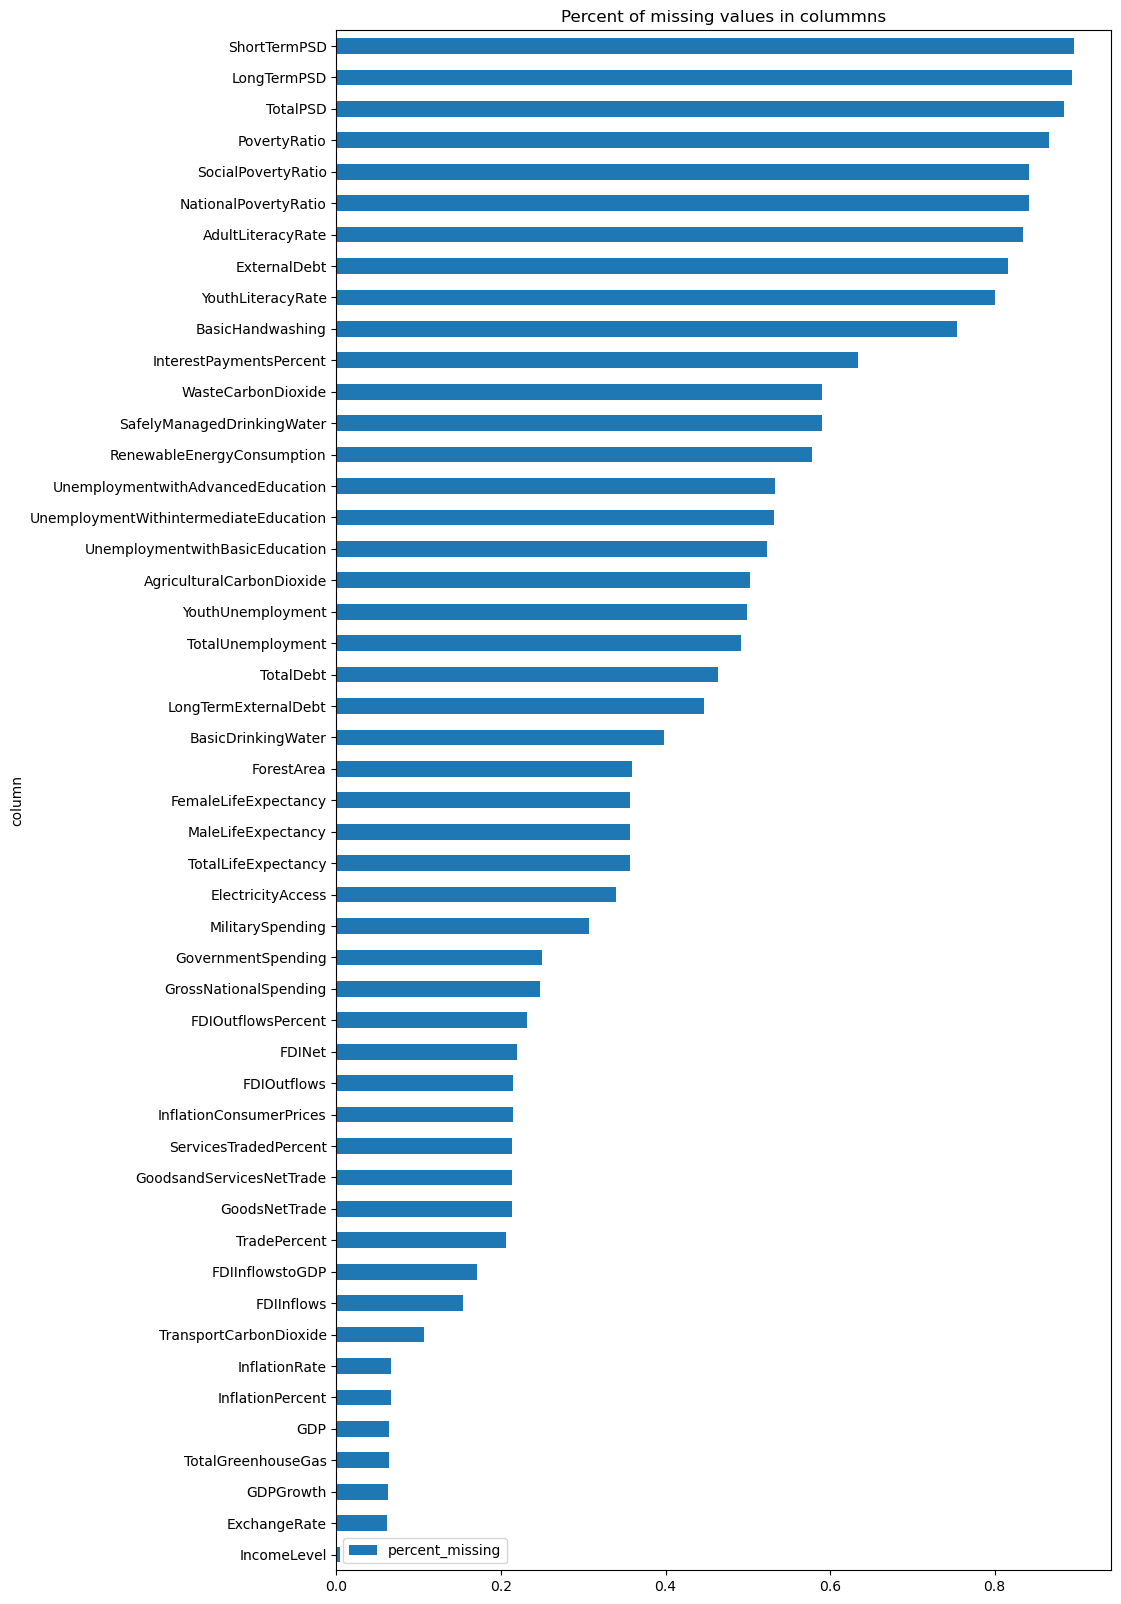

In [7]:
# visualize null values

def plot_missing_values(df):
    data = [(col, df[col].isnull().sum() / len(df)) 
            for col in df.columns if df[col].isnull().sum() > 0]
    col_names = ['column', 'percent_missing']
    missing_df = pd.DataFrame(data, columns=col_names).sort_values('percent_missing')
    pylab.rcParams['figure.figsize'] = (10, 20)
    missing_df.plot(kind='barh', x='column', y='percent_missing'); 
    plt.title('Percent of missing values in colummns');
plot_missing_values(df)

In [8]:
# get the 2021 data seperately

df21 = df[df['Year'] == 2021]
df21 = df21.reset_index(drop=True)

In [9]:
# see the shape for 2021 data

df21.shape

(217, 53)

In [10]:
# get the 2022 data seperately

df22 = df[df['Year'] == 2022]
df22 = df21.reset_index(drop=True)

In [11]:
# see the shape for 2022 data

df22.shape

(217, 53)

In [12]:
# get the 2023 data seperately

df23 = df[df['Year'] == 2023]
df23 = df23.reset_index(drop=True)

In [13]:
# see the shape for 2023 data

df23.shape

(217, 53)

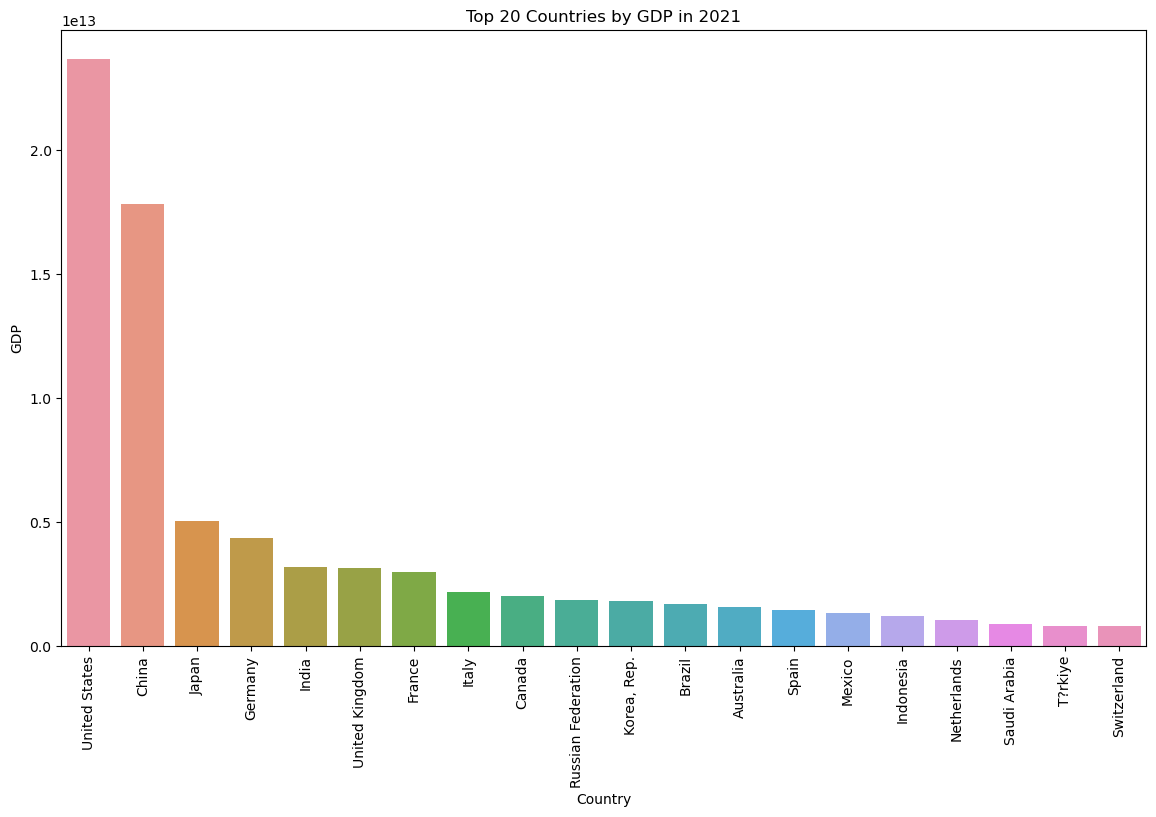

In [14]:
# top 20 countries by GDP in 2021

top20_gdp_2021 = df21.sort_values(by='GDP', ascending=False).head(20)
plt.figure(figsize=(14, 8))
sns.barplot(x='CountryName', y='GDP', data=top20_gdp_2021)
plt.xticks(rotation=90)
plt.title('Top 20 Countries by GDP in 2021')
plt.xlabel('Country')
plt.ylabel('GDP')
plt.show()

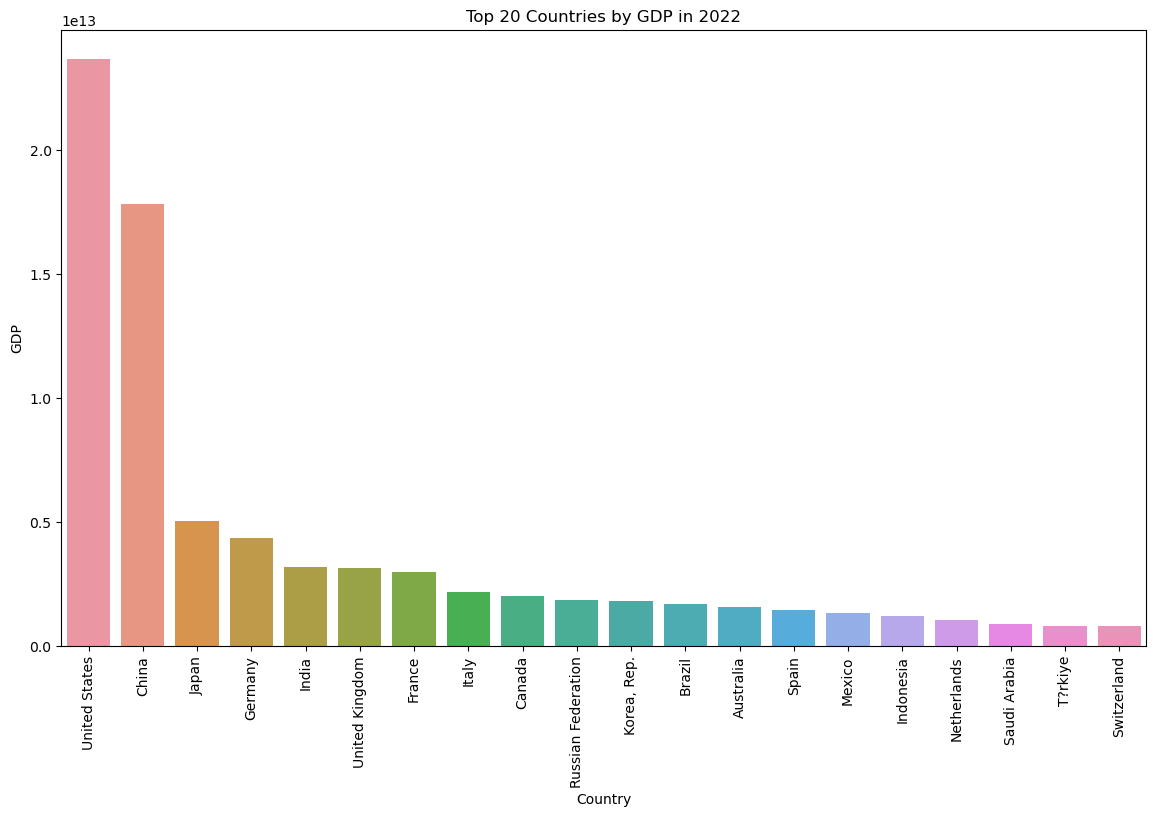

In [15]:
# top 20 countries by GDP in 2022

top20_gdp_2022 = df22.sort_values(by='GDP', ascending=False).head(20)
plt.figure(figsize=(14, 8))
sns.barplot(x='CountryName', y='GDP', data=top20_gdp_2022)
plt.xticks(rotation=90)
plt.title('Top 20 Countries by GDP in 2022')
plt.xlabel('Country')
plt.ylabel('GDP')
plt.show()

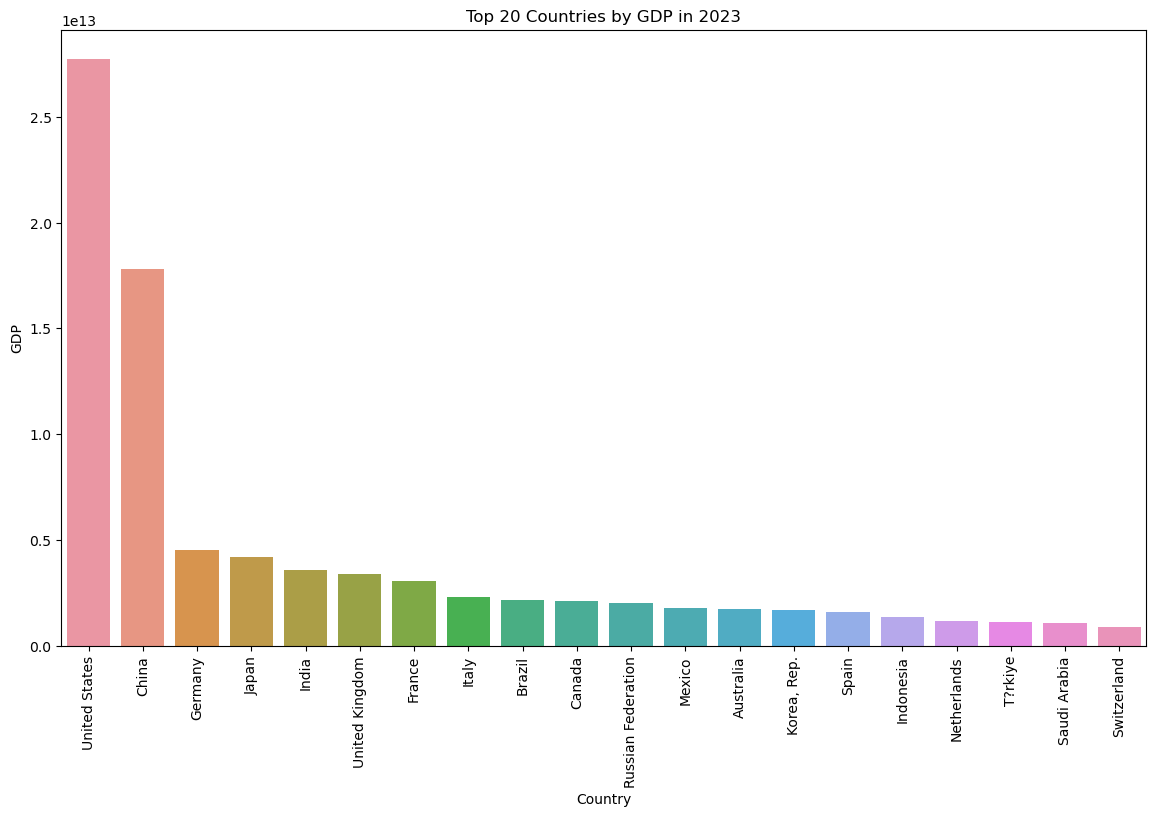

In [16]:
# top 20 countries by GDP in 2023

top20_gdp_2023 = df23.sort_values(by='GDP', ascending=False).head(20)
plt.figure(figsize=(14, 8))
sns.barplot(x='CountryName', y='GDP', data=top20_gdp_2023)
plt.xticks(rotation=90)
plt.title('Top 20 Countries by GDP in 2023')
plt.xlabel('Country')
plt.ylabel('GDP')
plt.show()

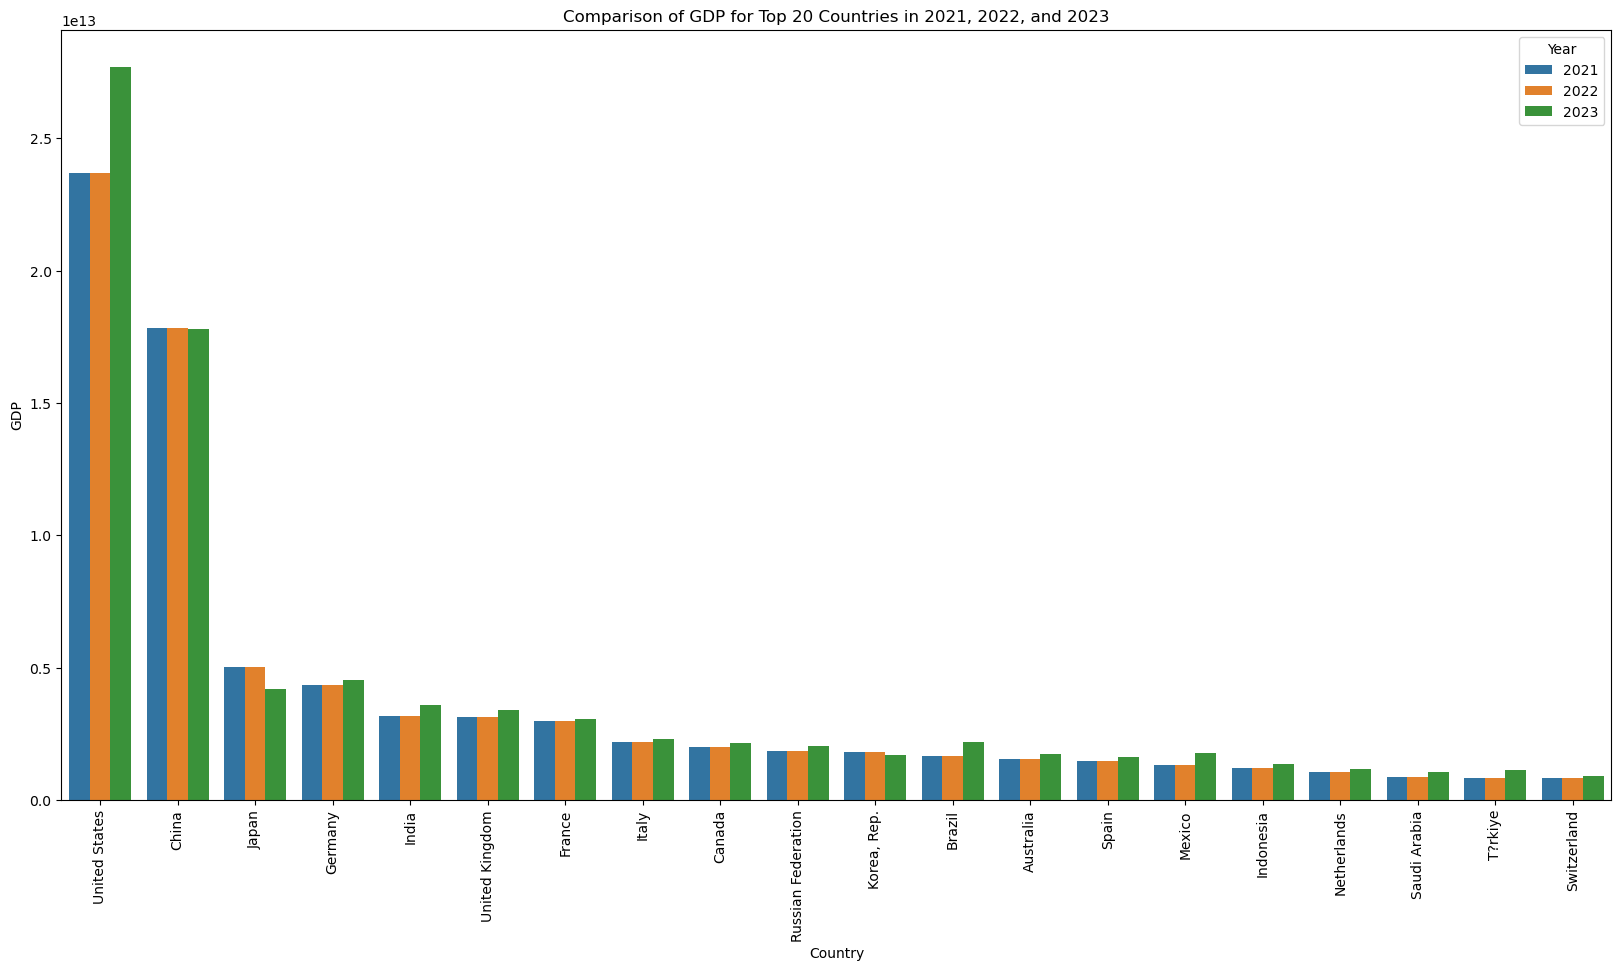

In [17]:
# change of GDP for top 20 countries from 2021 to 2023

top20_gdp_2021['Year'] = 2021
top20_gdp_2022['Year'] = 2022
top20_gdp_2023['Year'] = 2023
combined_gdp = pd.concat([top20_gdp_2021, top20_gdp_2022, top20_gdp_2023])
plt.figure(figsize=(20, 10))
sns.barplot(x='CountryName', y='GDP', hue='Year', data=combined_gdp)
plt.xticks(rotation=90)
plt.title('Comparison of GDP for Top 20 Countries in 2021, 2022, and 2023')
plt.xlabel('Country')
plt.ylabel('GDP')
plt.legend(title='Year')
plt.show()

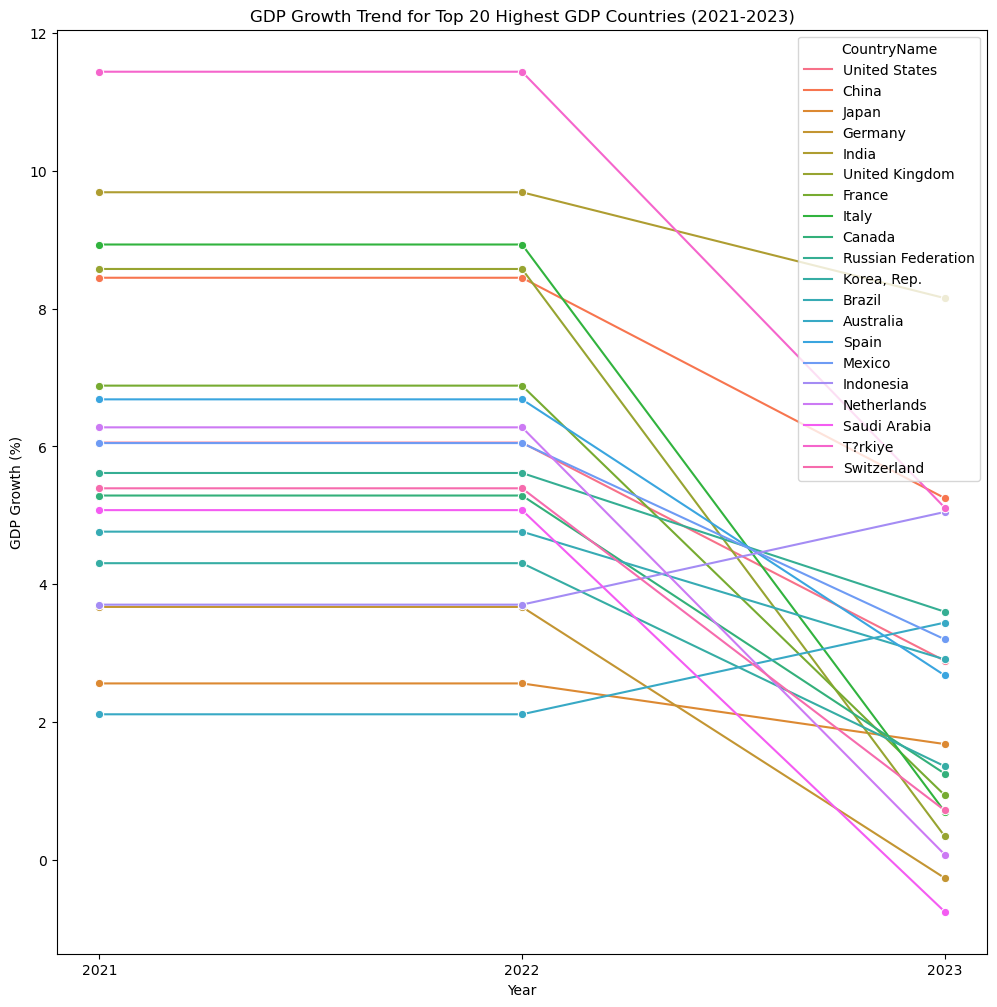

In [18]:
# the GDP growth trend for top 20 countries from 2021 to 2023

top20_gdp_2022['Year'] = 2022
top20_gdp_2023['Year'] = 2023

combined_gdp_growth = pd.concat([top20_gdp_2021[['CountryName', 'Year', 'GDPGrowth']],
                                 top20_gdp_2022[['CountryName', 'Year', 'GDPGrowth']],
                                 top20_gdp_2023[['CountryName', 'Year', 'GDPGrowth']]])


plt.figure(figsize=(12, 12))
sns.lineplot(data=combined_gdp_growth, x='Year', y='GDPGrowth', hue='CountryName', marker='o')

# Customize the x-axis to only show 2021, 2022, and 2023
plt.xticks([2021, 2022, 2023])

plt.title('GDP Growth Trend for Top 20 Highest GDP Countries (2021-2023)')
plt.xlabel('Year')
plt.ylabel('GDP Growth (%)')
plt.show()

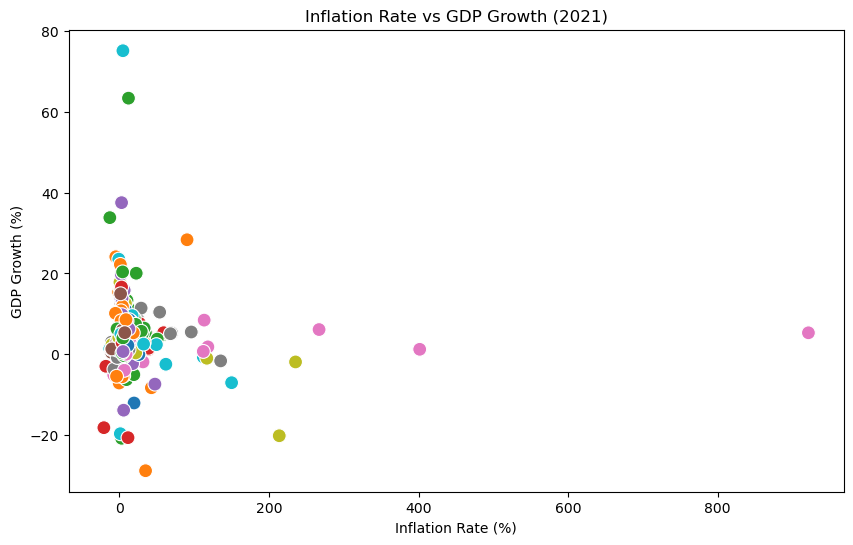

In [19]:
# Inflation Rate vs GDP Growth

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='InflationRate', y='GDPGrowth', hue='CountryName', palette='tab10', s=100)
plt.title('Inflation Rate vs GDP Growth (2021)')
plt.xlabel('Inflation Rate (%)')
plt.ylabel('GDP Growth (%)')
plt.legend([],[], frameon=False)  # Remove legend
plt.show()

In [20]:
# impute missing values 

columns_with_nulls = [col for col in df.columns if df[col].isnull().any() and col != 'IncomeLevel']
imputer = KNNImputer(n_neighbors=5)
df[columns_with_nulls] = imputer.fit_transform(df[columns_with_nulls])
print(df[columns_with_nulls].isna().sum())

FDINet                                   0
FDIInflowstoGDP                          0
FDIInflows                               0
FDIOutflowsPercent                       0
FDIOutflows                              0
GDP                                      0
GDPGrowth                                0
GovernmentSpending                       0
GrossNationalSpending                    0
InflationConsumerPrices                  0
InflationRate                            0
InflationPercent                         0
MilitarySpending                         0
GoodsNetTrade                            0
GoodsandServicesNetTrade                 0
TradePercent                             0
ServicesTradedPercent                    0
ElectricityAccess                        0
AgriculturalCarbonDioxide                0
TransportCarbonDioxide                   0
WasteCarbonDioxide                       0
ForestArea                               0
RenewableEnergyConsumption               0
TotalGreenh